# <center><font color=darkred>REGRESSION ANALYSIS FOR THE PREDICTION OF HOUSE PRICES</center>

<img src="https://www.camoinassociates.com/wp-content/uploads/2022/05/HousingCosts-1024x626.jpg" alt="Housing Costs" width=800>


In this project, we work with two datasets: train and test. The main objective is to predict the SalePrice variable, which is available in the train dataset but missing in the test dataset, using regression models. For this purpose, we will apply Gradient Boosting and Random Forest algorithms and compare their predictive performances.

Before model development, the train and test datasets will be combined to perform necessary data cleaning and feature engineering on all variables. After completing these preprocessing steps, the datasets will be separated again into train and test, and the modeling process will be carried out using the train dataset only.


**<font color=darkred>VARIABLES:**
    
    1.	SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict.

    2.	MSSubClass: The building class

    3.	MSZoning: The general zoning classification

    4.	LotFrontage: Linear feet of street connected to property

    5.	LotArea: Lot size in square feet

    6.	Street: Type of road access

    7.	Alley: Type of alley access

    8.	LotShape: General shape of property

    9.	LandContour: Flatness of the property

    10.	Utilities: Type of utilities available

    11.	LotConfig: Lot configuration

    12.	LandSlope: Slope of property

    13.	Neighborhood: Physical locations within Ames city limits

    14.	Condition1: Proximity to main road or railroad

    15.	Condition2: Proximity to main road or railroad (if a second is present)

    16.	BldgType: Type of dwelling

    17.	HouseStyle: Style of dwelling

    18.	OverallQual: Overall material and finish quality

    19.	OverallCond: Overall condition rating

    20.	YearBuilt: Original construction date

    21.	YearRemodAdd: Remodel date

    22.	RoofStyle: Type of roof

    23.	RoofMatl: Roof material

    24.	Exterior1st: Exterior covering on house

    25.	Exterior2nd: Exterior covering on house (if more than one material)

    26.	MasVnrType: Masonry veneer type

    27.	MasVnrArea: Masonry veneer area in square feet

    28.	ExterQual: Exterior material quality

    29.	ExterCond: Present condition of the material on the exterior

    30.	Foundation: Type of foundation

    31.	BsmtQual: Height of the basement

    32.	BsmtCond: General condition of the basement

    33.	BsmtExposure: Walkout or garden level basement walls

    34.	BsmtFinType1: Quality of basement finished area

    35.	BsmtFinSF1: Type 1 finished square feet

    36.	BsmtFinType2: Quality of second finished area (if present)

    37.	BsmtFinSF2: Type 2 finished square feet

    38.	BsmtUnfSF: Unfinished square feet of basement area

    39.	TotalBsmtSF: Total square feet of basement area

    40.	Heating: Type of heating

    41.	HeatingQC: Heating quality and condition

    42.	CentralAir: Central air conditioning

    43.	Electrical: Electrical system

    44.	1stFlrSF: First Floor square feet

    45.	2ndFlrSF: Second floor square feet

    46.	LowQualFinSF: Low quality finished square feet (all floors)

    47.	GrLivArea: Above grade (ground) living area square feet

    48.	BsmtFullBath: Basement full bathrooms

    49.	BsmtHalfBath: Basement half bathrooms

    50.	FullBath: Full bathrooms above grade

    51.	HalfBath: Half baths above grade

    52.	Bedroom: Number of bedrooms above basement level

    53.	Kitchen: Number of kitchens

    54.	KitchenQual: Kitchen quality

    55.	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

    56.	Functional: Home functionality rating

    57.	Fireplaces: Number of fireplaces

    58.	FireplaceQu: Fireplace quality

    59.	GarageType: Garage location

    60.	GarageYrBlt: Year garage was built

    61.	GarageFinish: Interior finish of the garage

    62.	GarageCars: Size of garage in car capacity

    63.	GarageArea: Size of garage in square feet

    64.	GarageQual: Garage quality

    65.	GarageCond: Garage condition

    66.	PavedDrive: Paved driveway

    67.	WoodDeckSF: Wood deck area in square feet

    68.	OpenPorchSF: Open porch area in square feet

    69.	EnclosedPorch: Enclosed porch area in square feet

    70.	3SsnPorch: Three season porch area in square feet

    71.	ScreenPorch: Screen porch area in square feet

    72.	PoolArea: Pool area in square feet

    73.	PoolQC: Pool quality

    74.	Fence: Fence quality

    75.	MiscFeature: Miscellaneous feature not covered in other categories

    76.	MiscVal: $Value of miscellaneous feature
    
    77.	MoSold: Month Sold
    
    78.	YrSold: Year Sold
    
    79.	SaleType: Type of sale
    
    80.	SaleCondition: Condition of sale

   

### <font color=darkblue> PACKAGE & DATA IMPORTING

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import miceforest as mf
from scipy.stats import ttest_ind
from sklearn.preprocessing import normalize, scale
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [257]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [258]:
len(train.columns) # train data length

81

In [259]:
len(test.columns) # test data length

80

In [260]:
missing_columns = set(train.columns) - set(test.columns) 
print(missing_columns)

# The variable which is available in the train set but not available in the test set:

{'SalePrice'}


**"SalePrice" will be used as the target variable.**

In [261]:
data = pd.concat([train,test], axis=0) # test and train sets are combined by adding the argument axis=0 

In [262]:
pd.set_option('display.max_columns', None) # show the all columns in data 
data.head(10) # the first 10 rows 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,

In [263]:
data.info() # data types of the variables

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

## <font color=darkblue>EDA - Explatory Data Analysis

In [264]:
data.tail() # the last 5 rows 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [265]:
data.shape # the numbers of the rows and columns in data 

(2919, 81)

#### <font color=darkblue> EKSİK GÖZLEMLER

In [266]:
eksik = pd.DataFrame(data.isnull().sum()) # total missing values for every variables
eksik[eksik[0]!=0]

,0
MSZoning,4
LotFrontage,486
Alley,2721
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,1766
MasVnrArea,23
BsmtQual,81
BsmtCond,82


In [267]:
df.describe().T # Descriptive Statistics 

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
LotFrontage,2919.0,69.254197,23.082943,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2919.0,102.206235,178.998059,0.0,0.0,0.0,165.0,1600.0
BsmtFinSF1,2919.0,441.272011,455.606014,0.0,0.0,368.0,733.0,5644.0
BsmtUnfSF,2919.0,560.579993,439.590889,0.0,220.0,467.0,805.0,2336.0
TotalBsmtSF,2919.0,1051.901679,440.741721,0.0,793.0,990.0,1302.0,6110.0


## <font color=darkblue> FILLING THE MISSING VALUES

In [268]:
eksikx= data.drop(["SalePrice"], axis=1) # the features with missing values except for the target variable "SalePrice"

eksikx = eksikx.reset_index(drop=True)

In [269]:
for col in eksikx.columns:
    if eksikx[col].dtype == 'object':
        eksikx[col] = eksikx[col].astype('category')

# transform the object type variables to category type

In [270]:
imp=mf.ImputationKernel(eksikx) # produce values for missing values in every variables by using Imputation Kernel method

C:\Users\HP\anaconda3\Lib\site-packages\miceforest\imputation_kernel.py:276: UserWarning: Exterior1st,Exterior2nd,BsmtCond,Electrical,Functional,GarageQual,GarageCond,SaleType have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(


In [271]:
imp.complete_data() # new values are added

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Ex,GdWo,Gar2,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Ex,MnPrv,Shed,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Ex,GdWo,Shed,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Ex,MnPrv,Shed,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Ex,MnPrv,Shed,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,TA,Attchd,1994.0,Unf,0.0,0.0,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,Ex,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,Fa,GdPrv,Shed,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,Fa,GdPrv,Shed,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1

In [272]:
dolux=imp.complete_data()

In [273]:
bosy= data["SalePrice"]
bosy = bosy.reset_index(drop=True)

In [274]:
df=pd.concat([dolux,bosy], axis=1) # the new x data (features) imputed and y data with missing values are combined horizontally

**Is the missing values filled?:**

In [275]:
a=pd.DataFrame(df.isnull().sum())
a[a[0]!=0]

,0
SalePrice,1459


### <font color=darkblue>CORRELATION ANALYSIS ;

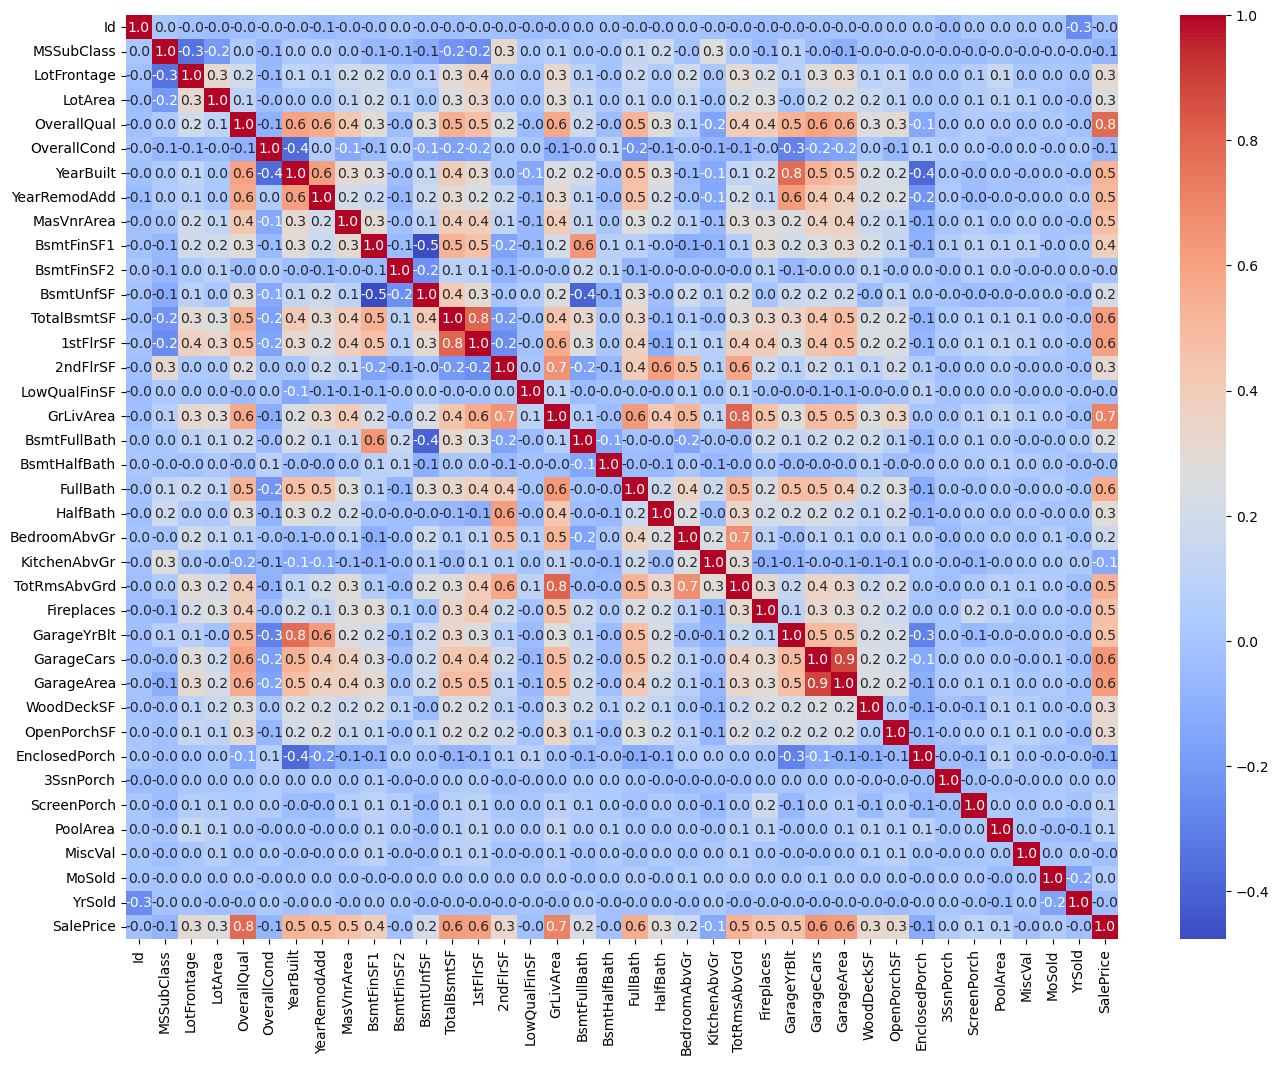

In [276]:
# Correlation Heatmap

plt.figure(figsize=(16, 12))  
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f')
plt.show()


### The variables which have the correlation values with "SalePrice" less than 0.20:

In [277]:
kor=abs(df.corr(numeric_only=True)["SalePrice"]) # Correlation values 
kor[kor<0.20] # correlation values less than 0.20


Id               0.021917
MSSubClass       0.084284
OverallCond      0.077856
BsmtFinSF2       0.011378
LowQualFinSF     0.025606
BsmtHalfBath     0.016844
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal          0.021190
MoSold           0.046432
YrSold           0.028923
Name: SalePrice, dtype: float64

### T-test for The Low Correlation Values:

**H0: There is not meaningful correlation between the two variables.**

**H1: There is  meaningful correlation between the two variables.**

**If p-value is less than 0.05, H0 is rejected.**

In [278]:
_,p=ttest_ind(df["SalePrice"], df["YrSold"])

In [279]:
p<0.05 

False

**Based on the t-test results conducted for the variables with correlation values below 0.20, we concluded that these variables do not have a statistically significant relationship with the target variable. Therefore, they will not be included in the modeling process:**

In [280]:
df= df.drop(["MSSubClass", "OverallCond", "BsmtFinSF2", "LowQualFinSF", "BsmtHalfBath", "BedroomAbvGr", "KitchenAbvGr", 
              "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"], axis=1)

In [281]:
train.shape

(1460, 81)

**Separate the data to test and train:**

In [282]:
train = df.head(1460) # the first 1460 rows is train set 
test = df[1460:] # the other rows is test set

In [283]:
train.shape

(1460, 67)

In [284]:
test.shape

(1459, 67)

**Define the features and the target variable for the Regression Models:**

In [285]:
y= train["SalePrice"] # Target value

In [286]:
x= train.drop(["Id", "SalePrice"], axis=1) # drop the columns of "Id" and "SalePrice"

In [287]:
x=pd.get_dummies(x,drop_first=True) # Dummy Tranformation for Categorical Variables

### SCALING

If the variables are defined with different units, The values should be come in the same unit by scaling:

In [288]:
yenix= scale(x) # scaling

In [289]:
x=pd.DataFrame(yenix, columns=[x.columns]) 

### <font color=darkblue> TEST & TRAIN

In [290]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

### <font color=darkblue> MODELLING

#### <font color=softblue>Random Forest Regression Model

In [291]:
rf=RandomForestRegressor() # model

In [292]:
rfmod=rf.fit(x_train,y_train) # model training

In [293]:
tahmin1=rf.predict(x_test) # y predictions

#### <font color=softblue>Gradient Boosting Regression Model

In [294]:
gbr = GradientBoostingRegressor()

In [295]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [296]:
tahmin2 = gbr.predict(x_test) # y predictions

### <font color=darkblue> THE METRICS FOR MODEL PERFORMANCE

In [318]:
def algo_test(x, y):
    #Define the models' names 
    
    GBR = GradientBoostingRegressor()
    RF = RandomForestRegressor()
    
    
    algos  = [GBR, RF]
    algo_names = ["Gradient Boosting", "Random Forest"]
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)
    
    r_squared = []
    rmse = []
    mae = []
    
    # create a dataframe showing the percentages of incorrect and  correct values:
    
    result = pd.DataFrame(columns = ["R_Squared", "RMSE", "MAE"], index=algo_names)
    
    for algo in algos:
        p= algo.fit(x_train, y_train).predict(x_test)
        r_squared.append(r2_score(y_test,p))
        rmse.append(mean_squared_error(y_test, p)**.5)
        mae.append(mean_absolute_error(y_test, p))
        
    # give the percentages of correctness and incorrectness to the result table:
    
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae
    
    #Sort the values on the result table according to the correctness score (R^2):
    
    rtable = result.sort_values("R_Squared", ascending=False)
    return rtable
    

In [319]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Random Forest,0.895702,28284.269795,17867.059144
Gradient Boosting,0.891673,28825.392427,18308.344582


**Both of the models' R^2 scores are higher than 0.85. So both of the models are successful. On the other hand, RMSE and MSE scores should be minimal. RMSE and MAE scores of the Random Forest Model are lower than the other model's.**

## The Importance Levels of The Features:

In [301]:
#FOR THE RANDOM FOREST MODEL:

importances = rf.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
})

feature_importance_rf = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_rf)

                   Feature  Importance
2           (OverallQual,)    0.549556
11            (GrLivArea,)    0.128424
6            (BsmtFinSF1,)    0.032417
8           (TotalBsmtSF,)    0.031570
10             (2ndFlrSF,)    0.030435
..                     ...         ...
177      (Electrical_Mix,)    0.000000
77      (Condition2_RRAe,)    0.000000
34     (Utilities_NoSeWa,)    0.000000
97     (RoofMatl_Membran,)    0.000000
120  (Exterior2nd_CBlock,)    0.000000

[230 rows x 2 columns]


In [305]:
#FOR THE GRADIENT BOOSTING MODEL:

importances = gbr.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
})


feature_importance_gbr = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_gbr)

                    Feature  Importance
2            (OverallQual,)    0.520991
11             (GrLivArea,)    0.151991
18            (GarageCars,)    0.047049
6             (BsmtFinSF1,)    0.044885
8            (TotalBsmtSF,)    0.038941
..                      ...         ...
78       (Condition2_RRAn,)    0.000000
79       (Condition2_RRNn,)    0.000000
80       (BldgType_2fmCon,)    0.000000
129  (Exterior2nd_VinylSd,)    0.000000
37         (LotConfig_FR3,)    0.000000

[230 rows x 2 columns]


**<font color=darkred> For both of the models, the most significant two feature variables are "OverallQual" and "GrLivArea"**

## <font color=darkblue> SalePrice Predictions:

In [314]:
test.isnull().sum()[test.isnull().sum()!=0]

SalePrice    1459
dtype: int64

In [321]:
testx= test.drop(["Id", "SalePrice"], axis=1)

In [323]:
testx=pd.get_dummies(testx, drop_first=True)

In [324]:
testy= test["SalePrice"]

In [325]:
tahmin_y=rf.predict(testx)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [329]:
tahmin_y=pd.DataFrame(tahmin_y, columns=["SalePrice"])

In [330]:
tahmin_y.head() # Sale Price Predictions

,SalePrice
0,383826.90
1,362497.77
2,560968.97
3,562263.30
4,380405.61
